In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dowhy
from dowhy import CausalModel
from IPython.display import Image, display

In [13]:
data=pd.read_csv("DATAstudents.csv")

Class Labels

Student ID
1- Student Age (1: 18-21, 2: 22-25, 3: above 26)
2- Sex (1: female, 2: male)
3- Graduated high-school type: (1: private, 2: state, 3: other)
4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
5- Additional work: (1: Yes, 2: No)
6- Regular artistic or sports activity: (1: Yes, 2: No)
7- Do you have a partner: (1: Yes, 2: No)
8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
11- Mothers education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
12- Fathers education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)
15- Mothers occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
16- Fathers occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
22- Attendance to classes (1: always, 2: sometimes, 3: never)
23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
25- Taking notes in classes: (1: never, 2: sometimes, 3: always)
26- Listening in classes: (1: never, 2: sometimes, 3: always)
27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
29- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
30- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
31- Course ID
32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)



![alt text](FI_initial.png "Feature importance")

While an attempt should be made to or the purposes of simplicity,only features that meet a minimum of 50 F score for at least 1 category will be included. features that were not included in the creation of the ML models will also not be included, for the reason that they don't have sufficient effect on the Dependent variable but also may not have a strong causal effect on each other. This assumption is  very unlikely to be correct, however it serves an important purpose in allowing the causality of this scenario to be modeled without excessive detail in the causal graph. The incorrectness of this assumption does render the resulting causal inference itself significantly less valid, but all the assumptions are stated so the causal inference model can be evaluated on that basis.

In [ ]:
df['8'].unique()

# Defining the Causal model
the causal model here will need to designed based on domain knowledge and the relationship of various features to each other, attempting to make reasonable assumptions about the causal direction of various relationships. It may be beneficial to take a look at other studies looking at causality factors for grades.
https://www.researchgate.net/figure/Causal-Loop-Diagram-created-in-order-to-plan-the-intervetions-for-the-following-courses_fig2_321106328

https://theeffectbook.net/ch-CausalDiagrams.html



As some of the included features are encoded and represent specific categories within features, they will be renamed as such. The entry for accomodation was duplicated across the 

dag={
AccomodationRental -> AvailableTime
AccomodationRental  -> GRADE
AccomodationRental  -> Transportation
AccomodationDorm -> AvailableTime
AccomodationDorm -> GRADE
AccomodationDorm -> Transportation
Age -> AccomodationRental
Age -> AccomodationDorm
Age -> AvailableTime
Age -> GRADE
Age -> MothersEmployment
Age -> OtherReading
Age -> Partner
Age -> Scholarship
Age -> StudentInterest
Age -> StudentWage
Age -> Transportation
AvailableTime -> ScientificReading
AvailableTime -> WeeklyStudy
OtherReading -> AvailableTime
Gender -> GRADE
Gender -> Scholarship
Gender -> StudentInterest
Gender -> StudentWage
MothersEducation -> AccomodationRental
MothersEducation -> AccomodationDorm
MothersEducation -> GRADE
MothersEducation -> MotherHousewife
MothersEducation -> OtherReading
MothersEducation -> Scholarship
MothersEducation -> ScientificReading
MothersEducation -> StudentInterest
MothersEducation -> StudentWage
MothersEducation -> Transportation
MotherHousewife -> AccomodationRental
MotherHousewife -> AccomodationDorm
MotherHousewife -> AvailableTime 
MotherHousewife -> GRADE
MotherHousewife -> Scholarship
MotherHousewife -> StudentWage
MotherHousewife -> Transportation
OtherReading -> GRADE
Partner -> AccomodationRental
Partner -> AccomodationDorm
Partner -> AvailableTime
Partner -> StudentInterest 
ProjectImpact -> GRADE
ProjectImpact -> StudentInterest
Scholarship -> GRADE
Scholarship -> Transportation
Scholarship -> StudentInterest 
StudentWage -> Scholarship 
ScientificReading -> GRADE
StudentInterest -> ScientificReading
StudentInterest -> TakingNotes
StudentInterest -> WeeklyStudy
StudentWage -> AccomodationRental
StudentWage -> AccomodationDorm
StudentWage -> AvailableTime
StudentWage -> GRADE
StudentWage -> Transportation
TakingNotes -> GRADE
TakingNotes -> ProjectImpact
Transportation -> AvailableTime
Transportation -> GRADE
WeeklyStudy -> GRADE
WeeklyStudy -> ProjectImpact
}


In [51]:
# https://www.pywhy.org/dowhy/v0.2/example_notebooks/load_graph_example.html
Graph="""digraph {AccomodationRental -> AvailableTime; AccomodationRental -> GRADE; AccomodationRental -> Transportation_Bus;
       Age -> AccomodationRental;AccomodationDorm -> AvailableTime; AccomodationDorm -> GRADE;
       AccomodationDorm -> Transportation_Bus; Age -> AccomodationDorm; Age -> AvailableTime;
       Age -> GRADE; Age -> MotherHousewife; Age -> OtherReading; Age -> Partner; Age -> Scholarship;
       Age -> StudentInterest; Age -> StudentWage; Age -> Transportation_Bus;
       AvailableTime -> ScientificReading; AvailableTime -> WeeklyStudy; OtherReading -> AvailableTime;
       Gender -> GRADE; Gender -> Scholarship; Gender -> StudentInterest;Gender -> StudentWage;
       MothersEducation -> AccomodationRental; MothersEducation -> AccomodationDorm;
       MothersEducation -> GRADE; MothersEducation -> MotherHousewife; MothersEducation -> OtherReading;
       MothersEducation -> Scholarship; MothersEducation -> ScientificReading; MothersEducation -> StudentInterest;
       MothersEducation -> StudentWage; MothersEducation -> Transportation_Bus; MotherHousewife -> AccomodationRental;
       MotherHousewife -> AccomodationDorm; MotherHousewife -> AvailableTime; MotherHousewife -> GRADE;
       MotherHousewife -> Scholarship;
       MotherHousewife -> StudentWage; MotherHousewife -> Transportation_Bus; OtherReading -> GRADE;
       Partner -> AccomodationRental; Partner -> AccomodationDorm; Partner -> AvailableTime;
       Partner -> StudentInterest;
       ProjectImpact -> GRADE;
       Scholarship -> GRADE; Scholarship -> Transportation_Bus;
       Scholarship -> StudentInterest; StudentWage -> Scholarship; ScientificReading -> GRADE;
       StudentInterest-> ScientificReading; StudentInterest -> TakingNotes;
       StudentInterest-> WeeklyStudy;
       StudentWage -> AccomodationRental; StudentWage -> AccomodationDorm; StudentWage -> AvailableTime;
       StudentWage -> GRADE;
       StudentWage -> Transportation_Bus; TakingNotes -> GRADE; TakingNotes -> ProjectImpact;
       Transportation_Bus -> AvailableTime; Transportation_Bus -> GRADE; WeeklyStudy -> GRADE; WeeklyStudy -> ProjectImpact;}
       """


C:\Users\milo\Anaconda3\lib\site-packages\dowhy\causal_model.py:582: UserWarning: 17 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


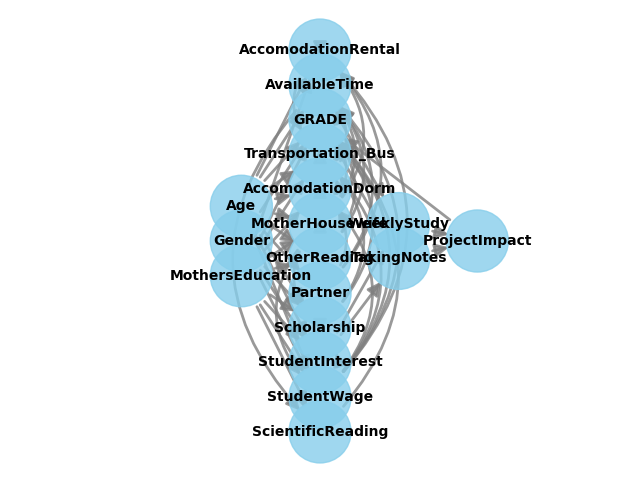

In [52]:
# With DOT string
model=CausalModel(
        data = df,
        treatment='WeeklyStudy',
        outcome='GRADE',
        graph=Graph
        )
model.view_model()


In [26]:
feature_names={"1": "Age", "2": "Gender", "4": "Scholarship", "7": "Partner", "8": "StudentWage", "9 cat _1": "Transportation_Bus", "10 cat _1": "AccomodationRental", "10 cat _2": "AccomodationDorm", "11": "MothersEducation", "15 cat _2": "MotherHousewife", "17": "WeeklyStudy", "18": "OtherReading", "19": "ScientificReading", "21": "ProjectImpact", "25": "TakingNotes", "COURSE ID": "Course"}


as some of the 1HE columns, several encoded columns were treated as only 1 column. for the purposes of the causal graph, for feature 9 and 15, only the most important cats, 1 & 2 respectively, will be included. For feature 10 however, both cat 1 and 2 will be included and will be duplicated within the causal graph, with each feature having Identical treatment 

In order of operations, to compare oranges to oranges, we will

drop all non alpha<.2 cols. also drop col 23, and Course ID as they will not be used for the purposese of the causal analysis

condense several cols prior to 1HE

1,2 to 0,1 two cols

1HE some cols
drop the catcols that aren't important

change the grade column

then finally replace the column names

In [22]:
df = data[['1', '2', '4', '7', '8', '9', '10', '11', '15', '17', '18', '19', '21', '25', 'GRADE']]

In [23]:
df["9"] = df["9"].replace({4:3})
df["10"] = df["10"].replace({4:3})
df["15"] = df["15"].replace({5:1})
df["2"] = df["2"].replace({1:0,2:1})
# now interpretable as Male (1) or not male/female (0)
df["7"] = df["7"].replace({2:0})
# now interpretable as has a partner yes(1) or no(0)

C:\Users\milo\AppData\Local\Temp\ipykernel_22348\4127616574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["9"] = df["9"].replace({4:3})
C:\Users\milo\AppData\Local\Temp\ipykernel_22348\4127616574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["10"] = df["10"].replace({4:3})
C:\Users\milo\AppData\Local\Temp\ipykernel_22348\4127616574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [24]:
columns_to_encode = ["9","10","15"]
prefixes = [f"{col} cat " for col in columns_to_encode]

df = pd.get_dummies(df, columns=columns_to_encode, prefix=prefixes)
df.head()

,1,2,4,7,8,11,17,18,19,21,...,9 cat _1,9 cat _2,9 cat _3,10 cat _1,10 cat _2,10 cat _3,15 cat _1,15 cat _2,15 cat _3,15 cat _4
0,2,1,3,0,1,1,3,2,2,1,...,1,0,0,1,0,0,0,1,0,0
1,2,1,3,0,1,2,2,2,2,1,...,1,0,0,1,0,0,0,1,0,0
2,2,1,3,0,2,2,2,1,2,1,...,0,0,1,0,1,0,0,1,0,0
3,1,0,3,1,2,1,3,1,2,1,...,1,0,0,0,1,0,0,1,0,0
4,2,1,3,1,3,3,2,1,1,1,...,1,0,0,0,0,1,0,1,0,0


In [25]:
df=df.drop(columns=['9 cat _2', '9 cat _3', '10 cat _3', '15 cat _1', '15 cat _3','15 cat _4'],axis = 1)
df.head()

,1,2,4,7,8,11,17,18,19,21,25,GRADE,9 cat _1,10 cat _1,10 cat _2,15 cat _2
0,2,1,3,0,1,1,3,2,2,1,3,1,1,1,0,1
1,2,1,3,0,1,2,2,2,2,1,3,1,1,1,0,1
2,2,1,3,0,2,2,2,1,2,1,2,1,0,0,1,1
3,1,0,3,1,2,1,3,1,2,1,3,1,1,0,1,1
4,2,1,3,1,3,3,2,1,1,1,2,1,1,0,0,1


In [28]:
df8 = df
df4 = df
df4["GRADE"] = df4["GRADE"].replace({1:0, 2:1, 3:1, 4:2, 5:2, 6:3, 7:3})

In [29]:
df8 = df8.rename(columns=feature_names)
df8.head()

,Age,Gender,Scholarship,Partner,StudentWage,MothersEducation,WeeklyStudy,OtherReading,ScientificReading,ProjectImpact,TakingNotes,GRADE,Transportation_Bus,AccomodationRental,AccomodationDorm,MotherHousewife
0,2,1,3,0,1,1,3,2,2,1,3,0,1,1,0,1
1,2,1,3,0,1,2,2,2,2,1,3,0,1,1,0,1
2,2,1,3,0,2,2,2,1,2,1,2,0,0,0,1,1
3,1,0,3,1,2,1,3,1,2,1,3,0,1,0,1,1
4,2,1,3,1,3,3,2,1,1,1,2,0,1,0,0,1


In [46]:
!pip install pydot

C:\Users\milo\Anaconda3\lib\site-packages\dowhy\causal_model.py:582: UserWarning: 2 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


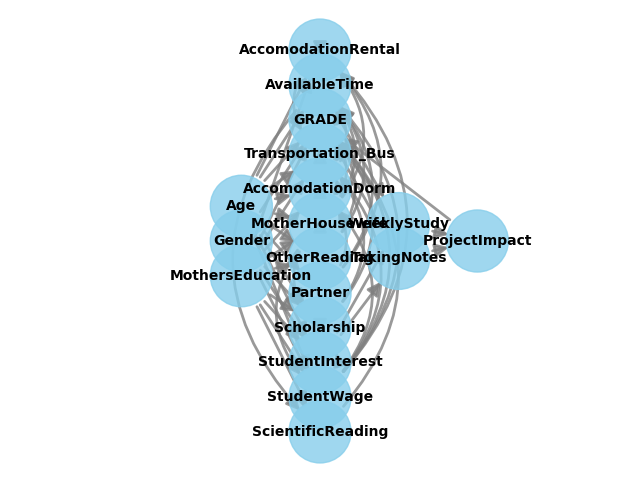

In [53]:
# With DOT string
model8=CausalModel(
        data = df8,
        treatment='WeeklyStudy',
        outcome='GRADE',
        graph=Graph
        )
model8.view_model()

In [54]:
identified_estimand = model8.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(E[GRADE|Gender,Age,TakingNotes,Transportation_Bus,OtherReading,
d[WeeklyStudy]                                                                

                                                                              
AccomodationRental,ScientificReading,Scholarship,StudentWage,MotherHousewife,M
                                                                              

                                  
othersEducation,AccomodationDorm])
                                  
Estimand assumption 1, Unconfoundedness: If U→{WeeklyStudy} and U→GRADE then P(GRADE|WeeklyStudy,Gender,Age,TakingNotes,Transportation_Bus,OtherReading,AccomodationRental,ScientificReading,Scholarship,StudentWage,MotherHousewife,MothersEducation,AccomodationDorm,U) = P(GRADE|WeeklyStudy,Gender,Age,TakingNotes

In [60]:
estimate = model8.estimate_effect(identified_estimand, method_name="backdoor.linear_regression", target_units="ate")


In [62]:
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(E[GRADE|Gender,Age,TakingNotes,Transportation_Bus,OtherReading,
d[WeeklyStudy]                                                                

                                                                              
AccomodationRental,ScientificReading,Scholarship,StudentWage,MotherHousewife,M
                                                                              

                                  
othersEducation,AccomodationDorm])
                                  
Estimand assumption 1, Unconfoundedness: If U→{WeeklyStudy} and U→GRADE then P(GRADE|WeeklyStudy,Gender,Age,TakingNotes,Transportation_Bus,OtherReading,AccomodationRental,ScientificReading,Scholarship,StudentWage,MotherHousewife,MothersEducation,AccomodationDorm

# for the 4 band grade feature

In [67]:
df4 = df4.rename(columns=feature_names)
df4.head()

,Age,Gender,Scholarship,Partner,StudentWage,MothersEducation,WeeklyStudy,OtherReading,ScientificReading,ProjectImpact,TakingNotes,GRADE,Transportation_Bus,AccomodationRental,AccomodationDorm,MotherHousewife
0,2,1,3,0,1,1,3,2,2,1,3,0,1,1,0,1
1,2,1,3,0,1,2,2,2,2,1,3,0,1,1,0,1
2,2,1,3,0,2,2,2,1,2,1,2,0,0,0,1,1
3,1,0,3,1,2,1,3,1,2,1,3,0,1,0,1,1
4,2,1,3,1,3,3,2,1,1,1,2,0,1,0,0,1


C:\Users\milo\Anaconda3\lib\site-packages\dowhy\causal_model.py:582: UserWarning: 2 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


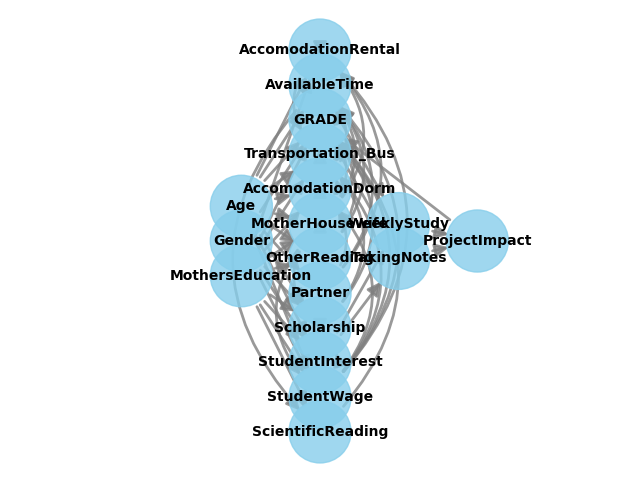

In [68]:
# With DOT string
model4=CausalModel(
        data = df4,
        treatment='WeeklyStudy',
        outcome='GRADE',
        graph=Graph
        )
model4.view_model()

In [69]:
identified_estimand4 = model4.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand4)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(E[GRADE|Gender,Age,TakingNotes,Transportation_Bus,OtherReading,
d[WeeklyStudy]                                                                

                                                                              
AccomodationRental,ScientificReading,Scholarship,StudentWage,MotherHousewife,M
                                                                              

                                  
othersEducation,AccomodationDorm])
                                  
Estimand assumption 1, Unconfoundedness: If U→{WeeklyStudy} and U→GRADE then P(GRADE|WeeklyStudy,Gender,Age,TakingNotes,Transportation_Bus,OtherReading,AccomodationRental,ScientificReading,Scholarship,StudentWage,MotherHousewife,MothersEducation,AccomodationDorm,U) = P(GRADE|WeeklyStudy,Gender,Age,TakingNotes

In [70]:
estimate4 = model4.estimate_effect(identified_estimand4, method_name="backdoor.linear_regression", target_units="ate")
print(estimate4)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(E[GRADE|Gender,Age,TakingNotes,Transportation_Bus,OtherReading,
d[WeeklyStudy]                                                                

                                                                              
AccomodationRental,ScientificReading,Scholarship,StudentWage,MotherHousewife,M
                                                                              

                                  
othersEducation,AccomodationDorm])
                                  
Estimand assumption 1, Unconfoundedness: If U→{WeeklyStudy} and U→GRADE then P(GRADE|WeeklyStudy,Gender,Age,TakingNotes,Transportation_Bus,OtherReading,AccomodationRental,ScientificReading,Scholarship,StudentWage,MotherHousewife,MothersEducation,AccomodationDorm

In [73]:
causal_estimate_dmatch4 = model4.estimate_effect(identified_estimand4,
                                              method_name="backdoor.distance_matching",
                                              target_units="ATE",
                                              method_params={'distance_metric':"minkowski", 'p':2})
print(causal_estimate_dmatch4)


Exception: Distance Matching method is applicable only for binary treatments.

https://arxiv.org/abs/1309.6361

## with EconML?

In [96]:
!pip install econml

In [84]:
!pip install --upgrade econml

In [85]:
!pip install numpy==1.20.3

     ---------------------------------------- 13.7/13.7 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
dataprep 0.4.5 requires numpy<2.0,>=1.21, but you have numpy 1.20.3 which is incompatible.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.20.3 which is incompatible.
pmdarima 2.0.3 requires numpy>=1.21.2, but you have numpy 1.20.3 which is incompatible.
jax 0.4.8 requires numpy>=1.21, but you have numpy 1.20.3 which is incompatible.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


In [87]:
import numpy as np
import pandas as pd
import logging

import dowhy
from dowhy import CausalModel
import dowhy.datasets

import econml
import warnings
warnings.filterwarnings('ignore')

In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate4 = model4.estimate_effect(identified_estimand4, method_name="backdoor.econml.dml.DML",
                                     control_value = 0,
                                     treatment_value = 1,
                                 target_units = 1,  # condition used for CATE
                                 confidence_intervals=False,
                                method_params={"init_params":{'model_y':GradientBoostingRegressor(),
                                                              'model_t': GradientBoostingRegressor(),
                                                              "model_final":LassoCV(fit_intercept=False), 
                                                              'featurizer':PolynomialFeatures(degree=1, include_bias=False)},
                                               "fit_params":{}})
print(dml_estimate)

ImportError: Error loading econml.dml.DML. Double-check the method name and ensure that all econml dependencies are installed.

## ATE for Mothers education

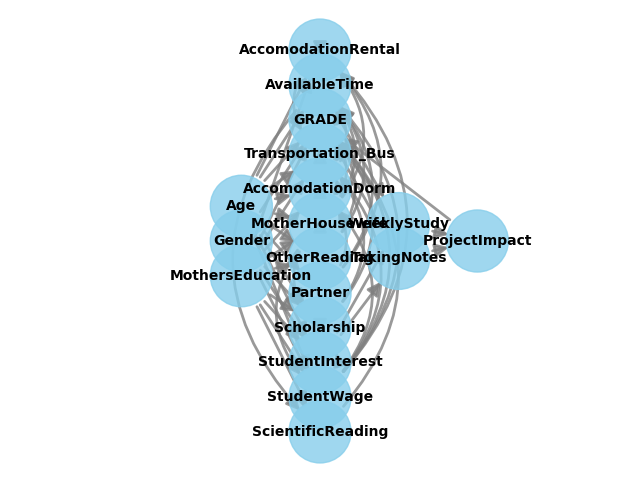

In [89]:
# With DOT string
modelM4=CausalModel(
        data = df4,
        treatment='MothersEducation',
        outcome='GRADE',
        graph=Graph
        )
modelM4.view_model()

In [90]:
identified_estimandM4 = modelM4.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimandM4)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                   
───────────────────(E[GRADE])
d[MothersEducation]          
Estimand assumption 1, Unconfoundedness: If U→{MothersEducation} and U→GRADE then P(GRADE|MothersEducation,,U) = P(GRADE|MothersEducation,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [91]:
estimateM4 = modelM4.estimate_effect(identified_estimandM4, method_name="backdoor.linear_regression", target_units="ate")
print(estimateM4)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                   
───────────────────(E[GRADE])
d[MothersEducation]          
Estimand assumption 1, Unconfoundedness: If U→{MothersEducation} and U→GRADE then P(GRADE|MothersEducation,,U) = P(GRADE|MothersEducation,)

## Realized estimand
b: GRADE~MothersEducation+MothersEducation*Gender+MothersEducation*Partner+MothersEducation*Age
Target units: 

## Estimate
Mean value: 0.08172315246427342
### Conditional Estimates
__categorical__Gender  __categorical__Partner  __categorical__Age
(-0.001, 0.6]          (-0.001, 1.0]           (0.999, 2.0]         -0.097053
                                               (2.0, 3.0]           -0.222607
(0.6, 1.0]             (-0.001, 1.0]           (0.999, 2.0]          0.214561
                                               (2.0, 3.0]            0.096521
dtype: float64


## ATE for StudentWage

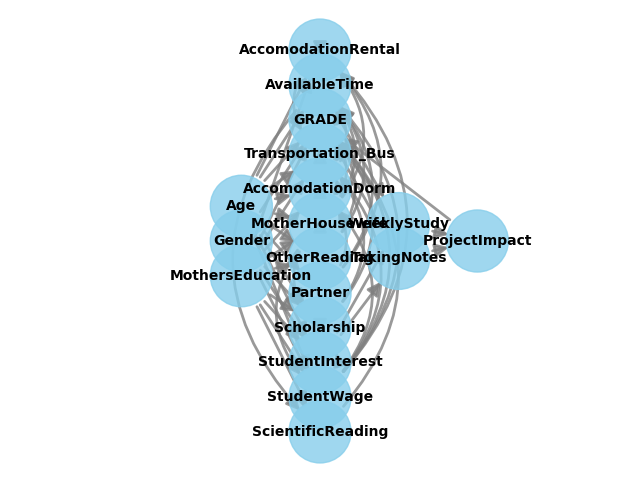

In [92]:
# With DOT string
modelS4=CausalModel(
        data = df4,
        treatment='StudentWage',
        outcome='GRADE',
        graph=Graph
        )
modelS4.view_model()

In [93]:
identified_estimandS4 = modelS4.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimandS4)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                             
──────────────(E[GRADE|Gender,Age,MotherHousewife,MothersEducation])
d[StudentWage]                                                      
Estimand assumption 1, Unconfoundedness: If U→{StudentWage} and U→GRADE then P(GRADE|StudentWage,Gender,Age,MotherHousewife,MothersEducation,U) = P(GRADE|StudentWage,Gender,Age,MotherHousewife,MothersEducation)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [95]:
estimateS4 = modelS4.estimate_effect(identified_estimandS4, method_name="backdoor.linear_regression", target_units="ate")
print(estimateS4)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                             
──────────────(E[GRADE|Gender,Age,MotherHousewife,MothersEducation])
d[StudentWage]                                                      
Estimand assumption 1, Unconfoundedness: If U→{StudentWage} and U→GRADE then P(GRADE|StudentWage,Gender,Age,MotherHousewife,MothersEducation,U) = P(GRADE|StudentWage,Gender,Age,MotherHousewife,MothersEducation)

## Realized estimand
b: GRADE~StudentWage+Gender+Age+MotherHousewife+MothersEducation+StudentWage*Partner+StudentWage*OtherReading
Target units: 

## Estimate
Mean value: -0.16085735724357408
### Conditional Estimates
__categorical__Partner  __categorical__OtherReading
(-0.001, 1.0]           (0.999, 2.0]                  -0.189442
                        (2.0, 3.0]                     0.028707
dtype: float64


# Features found from DTC FI

## Scholarship

In [97]:

modelSCH=CausalModel(
        data = df4,
        treatment='Scholarship',
        outcome='GRADE',
        graph=Graph
        )
identified_estimandSCH = modelSCH.identify_effect(proceed_when_unidentifiable=True)
estimateSCH = modelSCH.estimate_effect(identified_estimandSCH, method_name="backdoor.linear_regression", target_units="ate")
print(estimateSCH)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(E[GRADE|Gender,Age,MotherHousewife,StudentWage,MothersEducation
d[Scholarship]                                                                

  
])
  
Estimand assumption 1, Unconfoundedness: If U→{Scholarship} and U→GRADE then P(GRADE|Scholarship,Gender,Age,MotherHousewife,StudentWage,MothersEducation,U) = P(GRADE|Scholarship,Gender,Age,MotherHousewife,StudentWage,MothersEducation)

## Realized estimand
b: GRADE~Scholarship+Gender+Age+MotherHousewife+StudentWage+MothersEducation+Scholarship*Partner+Scholarship*OtherReading+Scholarship*AccomodationDorm+Scholarship*AccomodationRental
Target units: 

## Estimate
Mean value: 0.07937580704300395
### Conditional Estimates
__categorical__Partner  __categorical__OtherReading  __categorical__Acc

## OtherReading

In [99]:

modelOR=CausalModel(
        data = df4,
        treatment='OtherReading',
        outcome='GRADE',
        graph=Graph
        )
identified_estimandOR = modelOR.identify_effect(proceed_when_unidentifiable=True)
estimateOR = modelOR.estimate_effect(identified_estimandOR, method_name="backdoor.linear_regression", target_units="ate")
print(estimateOR)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                      
───────────────(E[GRADE|Age,MothersEducation])
d[OtherReading]                               
Estimand assumption 1, Unconfoundedness: If U→{OtherReading} and U→GRADE then P(GRADE|OtherReading,Age,MothersEducation,U) = P(GRADE|OtherReading,Age,MothersEducation)

## Realized estimand
b: GRADE~OtherReading+Age+MothersEducation+OtherReading*Gender+OtherReading*TakingNotes+OtherReading*Transportation_Bus+OtherReading*AccomodationRental+OtherReading*Scholarship+OtherReading*Partner+OtherReading*StudentWage+OtherReading*MotherHousewife+OtherReading*AccomodationDorm
Target units: 

## Estimate
Mean value: 0.382827419333459
### Conditional Estimates
__categorical__Gender  __categorical__TakingNotes  __categorical__Transportation_Bus  __categorical__AccomodationRental  __categorical__Scholarshi

## Partner
as parner is a binary treatment, it will be investigated to determine the effect of using Propensity Score methods as well as the linear regression one

In [100]:

modelp=CausalModel(
        data = df4,
        treatment='Partner',
        outcome='GRADE',
        graph=Graph
        )
identified_estimandp = modelp.identify_effect(proceed_when_unidentifiable=True)
estimatep = modelp.estimate_effect(identified_estimandp, method_name="backdoor.linear_regression", target_units="ate")
print(estimatep)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                   
──────────(E[GRADE|Age])
d[Partner]              
Estimand assumption 1, Unconfoundedness: If U→{Partner} and U→GRADE then P(GRADE|Partner,Age,U) = P(GRADE|Partner,Age)

## Realized estimand
b: GRADE~Partner+Age+Partner*Gender+Partner*Scholarship+Partner*MotherHousewife+Partner*StudentWage+Partner*MothersEducation+Partner*OtherReading
Target units: 

## Estimate
Mean value: 0.018225521702941228
### Conditional Estimates
__categorical__Gender  __categorical__Scholarship  __categorical__MotherHousewife  __categorical__StudentWage  __categorical__MothersEducation  __categorical__OtherReading
(-0.001, 0.6]          (0.999, 3.0]                (-0.001, 1.0]                   (0.999, 2.0]                (0.999, 2.0]                     (0.999, 2.0]                  -0.705478
                                      

In [101]:

modelp1=CausalModel(
        data = df4,
        treatment='Partner',
        outcome='GRADE',
        graph=Graph
        )
identified_estimandp1 = modelp1.identify_effect(proceed_when_unidentifiable=True)
estimatep1 = modelp1.estimate_effect(identified_estimandp1, method_name="backdoor.propensity_score_weighting", target_units="ate")
print(estimatep1)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                   
──────────(E[GRADE|Age])
d[Partner]              
Estimand assumption 1, Unconfoundedness: If U→{Partner} and U→GRADE then P(GRADE|Partner,Age,U) = P(GRADE|Partner,Age)

## Realized estimand
b: GRADE~Partner+Age
Target units: ate

## Estimate
Mean value: 0.06266864850937859

